In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [73]:
df = pd.read_csv("epa-sea-level.csv")

In [74]:
df.shape

(134, 5)

In [75]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


- Use matplotlib to create a scatter plot using the ```Year``` column as the x-axis and the ```CSIRO Adjusted Sea Level``` column as the y-axis.
- Use the ```linregress``` function from ```scipy.stats``` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be ```Year```, the y label should be ```Sea Level (inches)```, and the title should be ```Rise in Sea Level```.

In [76]:
res = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
print(res.slope, res.intercept, res.rvalue, res.pvalue, res.intercept_stderr)


0.06304458401213482 -119.06594196773983 0.984757131182585 3.7886969791130475e-102 1.886943381242523


Text(0.5, 1.0, 'Rise in Sea Level')

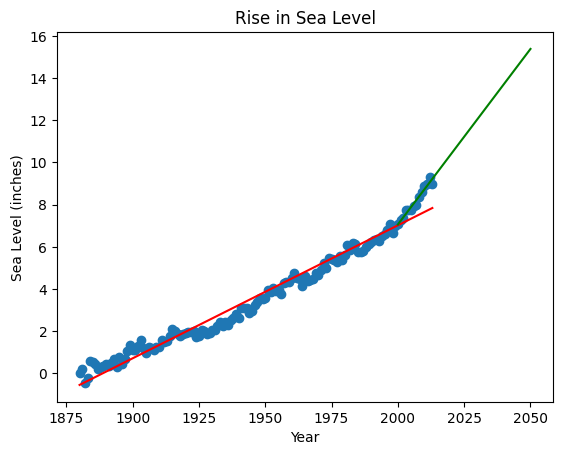

In [79]:
fig, ax = plt.subplots()
# Base scatter plot
fig = plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

# First line of best fit, line up to 2050
bestfitx1 = np.arange(df["Year"].min(), 2051, 1)
bestfitx1 = df["Year"]
bestfity1 = bestfitx1*res.slope + res.intercept
fig = plt.plot(bestfitx1, bestfity1, 'r')

# Second line of best fit, from 2000 to 2050
df_2000 = df[df["Year"]>=2000]
res2000 = linregress(df_2000["Year"], df_2000["CSIRO Adjusted Sea Level"])
bestfitx2 = np.arange(2000, 2051, 1)
bestfity2 = bestfitx2*res2000.slope + res2000.intercept
fig = plt.plot(bestfitx2, bestfity2, 'g')

# ax.set_xlabel('Year')
# ax.set_ylabel('Sea Level (inches)')
# ax.set_title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

In [78]:
df_2000 = df[df["Year"]>=2000]
df_2000.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933


In [69]:
res2000 = linregress(df_2000["Year"], df_2000["CSIRO Adjusted Sea Level"])
print(res2000.slope, res2000.intercept, res2000.rvalue, res2000.pvalue, res2000.intercept_stderr)

0.1664272733318682 -325.7934668059649 0.9762875716140618 2.4388064141618245e-09 21.375153425608215
